In [9]:
pip install rasterio geopandas matplotlib

Note: you may need to restart the kernel to use updated packages.


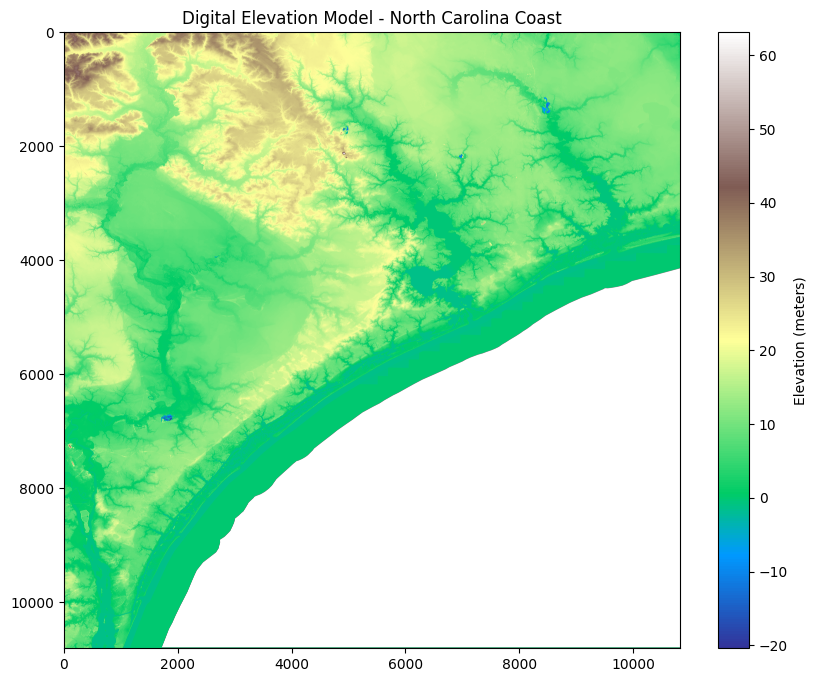

CRS: EPSG:4269
Bounds: BoundingBox(left=-78.0005555557936, bottom=33.99944444340724, right=-76.99944444360551, top=35.000555556494646)
Resolution: (9.259259269220167e-05, 9.25925927753796e-05)
NoData value: -999999.0
Valid elevation range: -20.4 to 63.1 meters
Valid elevation range: -20.4 to 63.1 meters


In [13]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Open DEM GeoTIFF
file_path = "../data/raw/USGS_13_n35w078_20250507.tif"  # <-- replace with your actual path
with rasterio.open(file_path) as src:
    dem = src.read(1)  # read the first band
    
    # FIXED: Handle NoData values properly
    nodata_value = src.nodata
    dem_masked = np.ma.masked_equal(dem, nodata_value)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(dem_masked, cmap="terrain")
    plt.colorbar(label="Elevation (meters)")
    plt.title("Digital Elevation Model - North Carolina Coast")
    plt.show()
    
    print("CRS:", src.crs)   # coordinate system
    print("Bounds:", src.bounds)  # min/max lat/long
    print("Resolution:", src.res)  # pixel size in meters
    print(f"NoData value: {nodata_value}")
    print(f"Valid elevation range: {np.min(dem_masked):.1f} to {np.max(dem_masked):.1f} meters")

=== DEM Data Analysis ===
Shape: (10812, 10812)
Data type: float32
NoData value: -999999.0
Min value: -999999.0
Max value: 63.136592864990234
Mean value: -339268.65625
Number of NoData pixels: 39661189
Unique values (first 10): [-9.9999900e+05 -2.0387230e+01 -2.0337488e+01 -2.0277880e+01
 -2.0246466e+01 -2.0245636e+01 -2.0240286e+01 -2.0236044e+01
 -2.0213966e+01 -2.0213791e+01]
Pixels with values < -1000: 39661189
Unique values (first 10): [-9.9999900e+05 -2.0387230e+01 -2.0337488e+01 -2.0277880e+01
 -2.0246466e+01 -2.0245636e+01 -2.0240286e+01 -2.0236044e+01
 -2.0213966e+01 -2.0213791e+01]
Pixels with values < -1000: 39661189


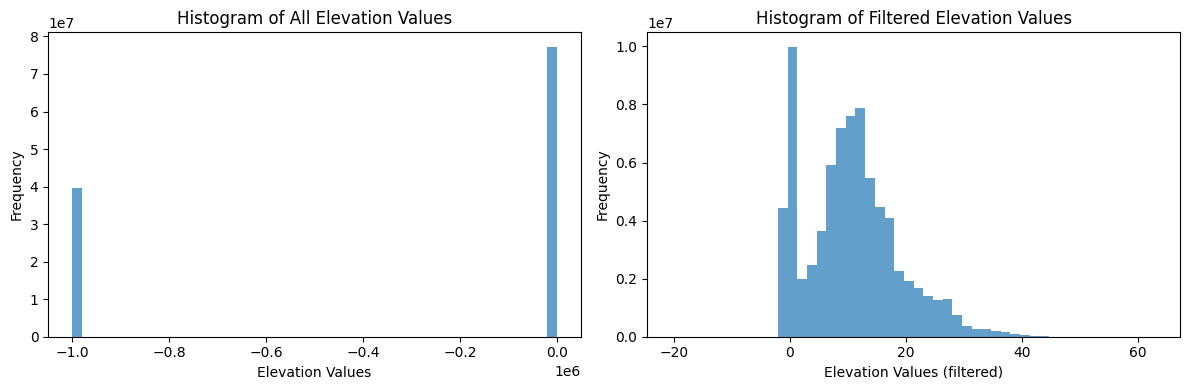

In [11]:
# Let's analyze the DEM data more thoroughly
import numpy as np

file_path = "../data/raw/USGS_13_n35w078_20250507.tif"
with rasterio.open(file_path) as src:
    dem = src.read(1)
    nodata_value = src.nodata
    
    print("=== DEM Data Analysis ===")
    print(f"Shape: {dem.shape}")
    print(f"Data type: {dem.dtype}")
    print(f"NoData value: {nodata_value}")
    print(f"Min value: {np.min(dem)}")
    print(f"Max value: {np.max(dem)}")
    print(f"Mean value: {np.mean(dem)}")
    print(f"Number of NoData pixels: {np.sum(dem == nodata_value) if nodata_value is not None else 'NoData value not set'}")
    print(f"Unique values (first 10): {np.unique(dem)[:10]}")
    
    # Check for very large negative values
    very_negative = dem < -1000
    print(f"Pixels with values < -1000: {np.sum(very_negative)}")
    
    # Create a histogram
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(dem.flatten(), bins=50, alpha=0.7)
    plt.xlabel('Elevation Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of All Elevation Values')
    
    plt.subplot(1, 2, 2)
    # Filter out extreme values for better visualization
    filtered_dem = dem[(dem > -1000) & (dem < 10000)]
    if len(filtered_dem) > 0:
        plt.hist(filtered_dem.flatten(), bins=50, alpha=0.7)
        plt.xlabel('Elevation Values (filtered)')
        plt.ylabel('Frequency')
        plt.title('Histogram of Filtered Elevation Values')
    else:
        plt.text(0.5, 0.5, 'No valid elevation data\nin reasonable range', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('No Valid Data in Reasonable Range')
    
    plt.tight_layout()
    plt.show()

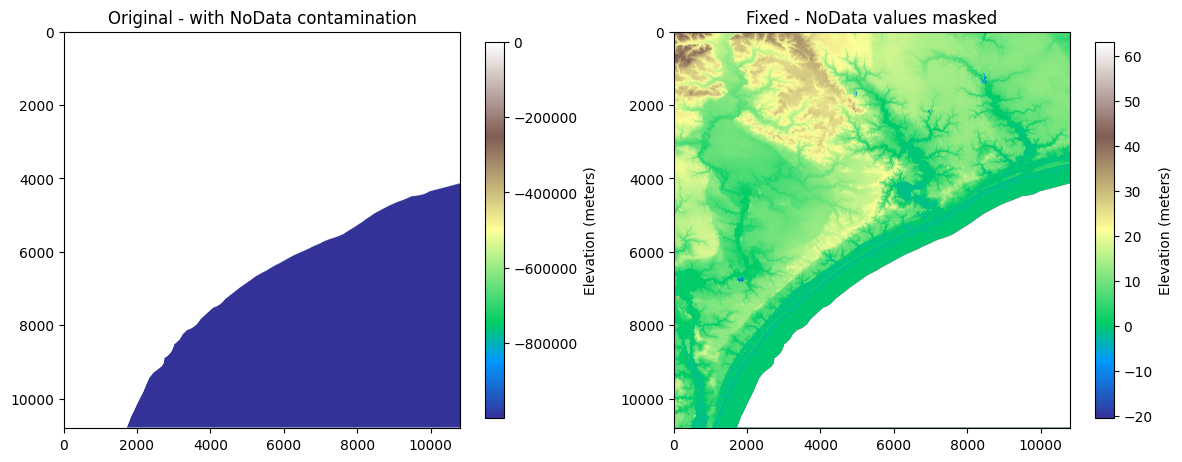

Valid elevation range: -20.387229919433594 to 63.136592864990234 meters
This represents the topography from -20.4m below sea level to 63.1m above sea level


In [12]:
# Fixed visualization - properly handle NoData values
import numpy as np

file_path = "../data/raw/USGS_13_n35w078_20250507.tif"
with rasterio.open(file_path) as src:
    dem = src.read(1)
    nodata_value = src.nodata
    
    # Create a masked array to handle NoData values properly
    dem_masked = np.ma.masked_equal(dem, nodata_value)
    
    plt.figure(figsize=(12, 5))
    
    # Original (problematic) visualization
    plt.subplot(1, 2, 1)
    plt.imshow(dem, cmap="terrain")
    plt.colorbar(label="Elevation (meters)", shrink=0.8)
    plt.title("Original - with NoData contamination")
    
    # Fixed visualization
    plt.subplot(1, 2, 2)
    plt.imshow(dem_masked, cmap="terrain")
    plt.colorbar(label="Elevation (meters)", shrink=0.8)
    plt.title("Fixed - NoData values masked")
    
    plt.tight_layout()
    plt.show()
    
    print(f"Valid elevation range: {np.min(dem_masked)} to {np.max(dem_masked)} meters")
    print(f"This represents the topography from {np.min(dem_masked):.1f}m below sea level to {np.max(dem_masked):.1f}m above sea level")

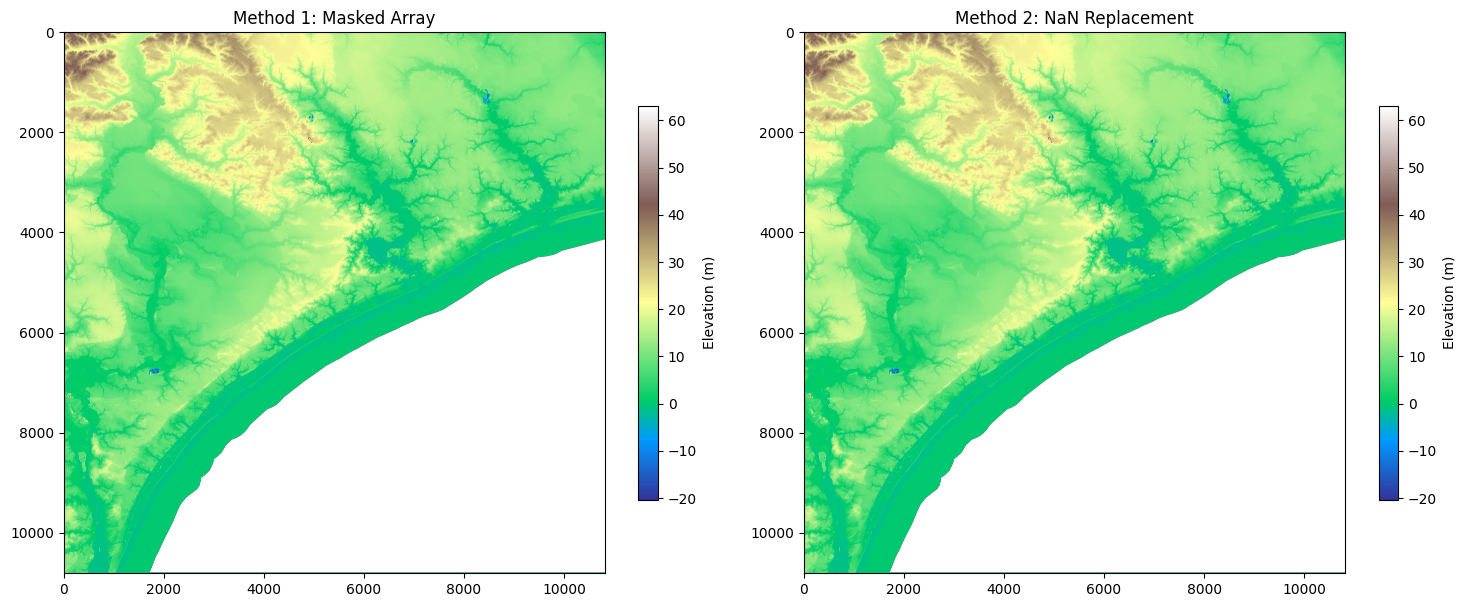

File: ../data/raw/USGS_13_n35w078_20250507.tif
Shape: (10812, 10812)
CRS: EPSG:4269
NoData value: -999999.0
Valid elevation range: -20.4 to 63.1 meters
Data coverage: 66.1% of pixels have valid data


In [14]:
# SOLUTION: Best practices for DEM visualization
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def visualize_dem_properly(file_path):
    """
    Properly visualize a DEM file handling NoData values
    """
    with rasterio.open(file_path) as src:
        dem = src.read(1)
        nodata_value = src.nodata
        
        # Method 1: Use numpy masked arrays
        dem_masked = np.ma.masked_equal(dem, nodata_value)
        
        # Method 2: Alternative - replace NoData with NaN
        dem_clean = dem.copy().astype(float)
        dem_clean[dem == nodata_value] = np.nan
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Masked array approach
        im1 = axes[0].imshow(dem_masked, cmap="terrain")
        axes[0].set_title("Method 1: Masked Array")
        plt.colorbar(im1, ax=axes[0], label="Elevation (m)", shrink=0.7)
        
        # NaN replacement approach  
        im2 = axes[1].imshow(dem_clean, cmap="terrain")
        axes[1].set_title("Method 2: NaN Replacement")
        plt.colorbar(im2, ax=axes[1], label="Elevation (m)", shrink=0.7)
        
        plt.tight_layout()
        plt.show()
        
        # Print metadata
        print(f"File: {file_path}")
        print(f"Shape: {dem.shape}")
        print(f"CRS: {src.crs}")
        print(f"NoData value: {nodata_value}")
        print(f"Valid elevation range: {np.nanmin(dem_clean):.1f} to {np.nanmax(dem_clean):.1f} meters")
        print(f"Data coverage: {np.sum(~np.isnan(dem_clean)) / dem_clean.size * 100:.1f}% of pixels have valid data")

# Use the function
visualize_dem_properly("../data/raw/USGS_13_n35w078_20250507.tif")

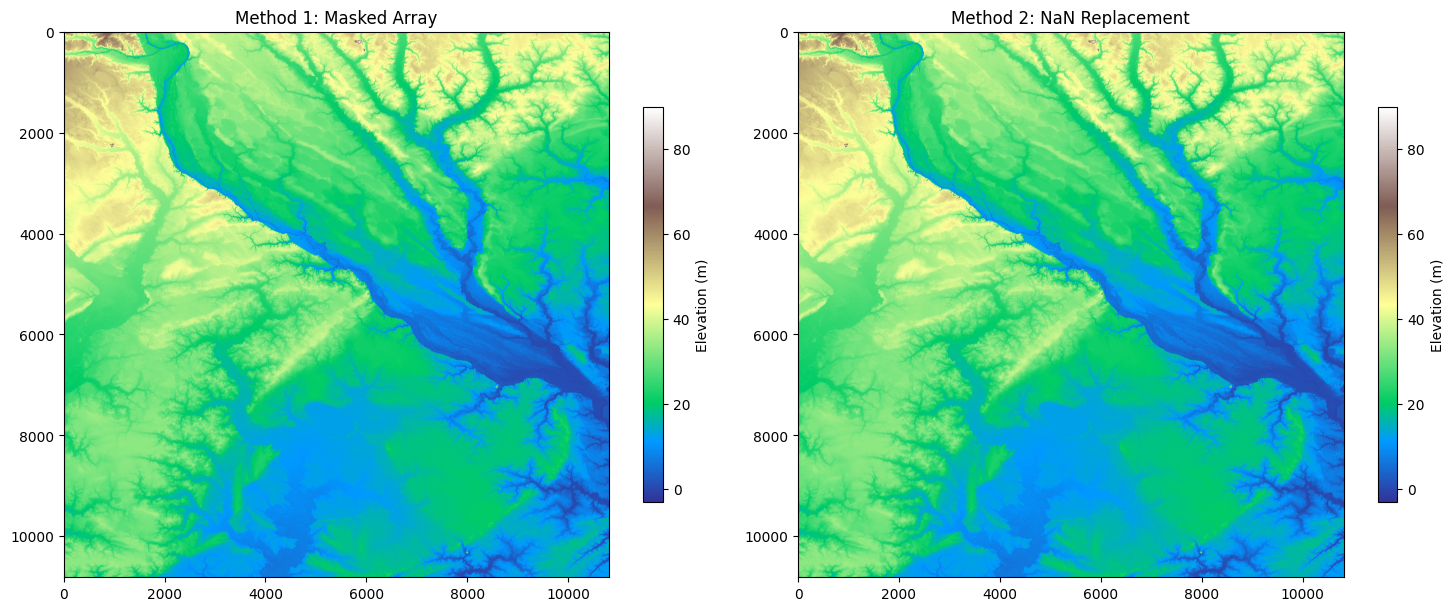

File: ../data/raw/USGS_13_n35w079_20250507.tif
Shape: (10812, 10812)
CRS: EPSG:4269
NoData value: -999999.0
Valid elevation range: -2.9 to 89.7 meters
Data coverage: 100.0% of pixels have valid data
Valid elevation range: -2.9 to 89.7 meters
Data coverage: 100.0% of pixels have valid data


In [15]:
visualize_dem_properly("../data/raw/USGS_13_n35w079_20250507.tif")

# 🛠️ How to Debug and Fix DEM Visualization Issues

## Step-by-Step Troubleshooting Guide

When your DEM visualization looks wrong (all one color, weird colors, or massive negative values), follow these diagnostic steps:

### 1. **First Signs of Problems**
- Image shows only one color (usually dark blue/purple)
- Color bar shows huge negative numbers (like -999999)
- Elevation values seem unrealistic
- Can't see topographic features

### 2. **Diagnostic Steps**

In [16]:
# STEP 1: Always inspect your data first!
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def diagnose_dem_issues(file_path):
    """
    Run this function first to diagnose what's wrong with your DEM
    """
    print("=== DEM DIAGNOSTIC REPORT ===")
    
    with rasterio.open(file_path) as src:
        dem = src.read(1)
        nodata_value = src.nodata
        
        print(f"✅ File opened successfully")
        print(f"📏 Shape: {dem.shape}")
        print(f"🔢 Data type: {dem.dtype}")
        print(f"❌ NoData value: {nodata_value}")
        print(f"📊 Min value: {np.min(dem)}")
        print(f"📊 Max value: {np.max(dem)}")
        print(f"📊 Mean value: {np.mean(dem):.2f}")
        
        # Key diagnostic checks
        if nodata_value is not None:
            nodata_count = np.sum(dem == nodata_value)
            total_pixels = dem.size
            print(f"🚨 NoData pixels: {nodata_count:,} ({nodata_count/total_pixels*100:.1f}%)")
            
            if nodata_count > 0:
                print("⚠️  PROBLEM DETECTED: NoData values present!")
                print("   This is likely causing your visualization issues.")
        
        # Check for unrealistic elevation values
        if np.min(dem) < -1000 or np.max(dem) > 10000:
            print("⚠️  WARNING: Extreme elevation values detected!")
            print("   Check if these are NoData values or data errors.")
            
        # Show first few unique values
        unique_vals = np.unique(dem)[:10]
        print(f"🔍 First 10 unique values: {unique_vals}")
        
        return dem, nodata_value

# Test with your file
dem, nodata = diagnose_dem_issues("../data/raw/USGS_13_n35w078_20250507.tif")

=== DEM DIAGNOSTIC REPORT ===
✅ File opened successfully
📏 Shape: (10812, 10812)
🔢 Data type: float32
❌ NoData value: -999999.0
📊 Min value: -999999.0
📊 Max value: 63.136592864990234
📊 Mean value: -339268.66
🚨 NoData pixels: 39,661,189 (33.9%)
⚠️  PROBLEM DETECTED: NoData values present!
   This is likely causing your visualization issues.
⚠️  WARNING: Extreme elevation values detected!
   Check if these are NoData values or data errors.
🔍 First 10 unique values: [-9.9999900e+05 -2.0387230e+01 -2.0337488e+01 -2.0277880e+01
 -2.0246466e+01 -2.0245636e+01 -2.0240286e+01 -2.0236044e+01
 -2.0213966e+01 -2.0213791e+01]


In [ ]:
# STEP 2: The Standard Fix - Use this pattern every time!

def fix_dem_visualization(file_path, method="masked"):
    """
    Standard function to properly visualize any DEM file
    
    Parameters:
    -----------
    file_path : str
        Path to your DEM file
    method : str
        'masked' or 'nan' - both work well
    """
    
    with rasterio.open(file_path) as src:
        dem = src.read(1)
        nodata_value = src.nodata
        
        if method == "masked":
            # Method 1: Masked arrays (recommended)
            if nodata_value is not None:
                dem_clean = np.ma.masked_equal(dem, nodata_value)
            else:
                dem_clean = dem
                
        elif method == "nan":
            # Method 2: Replace with NaN
            dem_clean = dem.copy().astype(float)
            if nodata_value is not None:
                dem_clean[dem == nodata_value] = np.nan
        
        # Create the plot
        plt.figure(figsize=(10, 8))
        plt.imshow(dem_clean, cmap="terrain")
        plt.colorbar(label="Elevation (meters)")
        plt.title(f"DEM Visualization - {method.title()} Method")
        plt.show()
        
        # Print useful info
        if hasattr(dem_clean, 'compressed'):  # masked array
            valid_data = dem_clean.compressed()
        else:  # regular array with NaN
            valid_data = dem_clean[~np.isnan(dem_clean)]
            
        print(f"✅ Visualization complete using {method} method")
        print(f"📊 Valid elevation range: {np.min(valid_data):.1f} to {np.max(valid_data):.1f} meters")
        
        return dem_clean

# Use it - try both methods to see which you prefer
print("=== MASKED ARRAY METHOD ===")
dem_fixed1 = fix_dem_visualization("../data/raw/USGS_13_n35w078_20250507.tif", method="masked")

print("\n=== NAN REPLACEMENT METHOD ===")
dem_fixed2 = fix_dem_visualization("../data/raw/USGS_13_n35w078_20250507.tif", method="nan")

## 🎯 Quick Reference: The Most Common Fixes

### **Problem**: Weird colors or all one color
**Root Cause**: NoData values are contaminating your color scale
**Solution**: Always mask NoData values before plotting

### **The Magic Lines** (copy-paste these):
```python
# For any DEM file, add these lines before plt.imshow():
nodata_value = src.nodata
if nodata_value is not None:
    dem_clean = np.ma.masked_equal(dem, nodata_value)
else:
    dem_clean = dem
    
# Then use dem_clean instead of dem in imshow
plt.imshow(dem_clean, cmap="terrain")
```

### **Alternative Magic Lines**:
```python
# Replace NoData with NaN approach:
dem_clean = dem.copy().astype(float)
if src.nodata is not None:
    dem_clean[dem == src.nodata] = np.nan
plt.imshow(dem_clean, cmap="terrain")
```

## 🔍 How to Recognize the Problem:

1. **Visual clues**: Image is mostly one color (usually dark blue/purple)
2. **Color bar clues**: Shows extreme values like -999999 or 32767
3. **Histogram clues**: Most data clustered at extreme values
4. **Metadata clues**: Check `src.nodata` - if it's not None, you need to handle it!

📂 Loading: ../data/raw/USGS_13_n35w078_20250507.tif
🚨 NoData value detected: -999999.0
🚨 NoData value detected: -999999.0
✅ Masking 39,661,189 NoData pixels
📊 77,238,155 valid pixels remaining
✅ Masking 39,661,189 NoData pixels
📊 77,238,155 valid pixels remaining


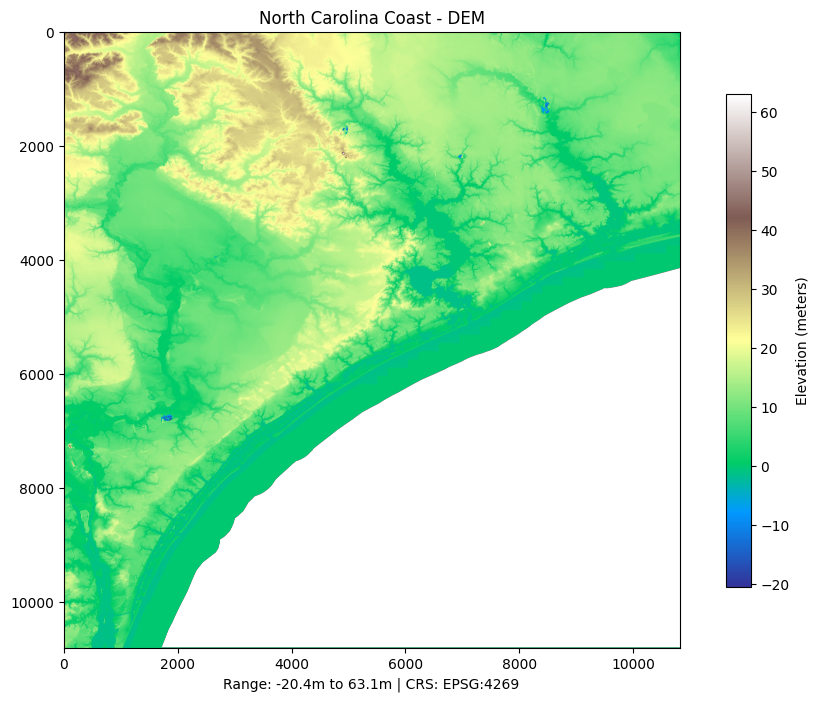

🗺️  CRS: EPSG:4269
📐 Resolution: 0.000093° x 0.000093°
📏 Dimensions: (10812, 10812)
📊 Elevation range: -20.4 to 63.1 meters


In [17]:
# 🛠️ Your New Standard DEM Template
# Copy this entire cell for any future DEM work!

import rasterio
import numpy as np
import matplotlib.pyplot as plt

def load_and_visualize_dem(file_path, title="Digital Elevation Model"):
    """
    One-stop function for loading and visualizing any DEM file properly
    Handles all the common issues automatically
    """
    
    print(f"📂 Loading: {file_path}")
    
    with rasterio.open(file_path) as src:
        # Load the data
        dem = src.read(1)
        nodata_value = src.nodata
        
        # Always check for and handle NoData values
        if nodata_value is not None:
            print(f"🚨 NoData value detected: {nodata_value}")
            dem_clean = np.ma.masked_equal(dem, nodata_value)
            valid_pixels = np.sum(~dem_clean.mask)
            print(f"✅ Masking {np.sum(dem_clean.mask):,} NoData pixels")
            print(f"📊 {valid_pixels:,} valid pixels remaining")
        else:
            print("✅ No NoData values detected")
            dem_clean = dem
            valid_pixels = dem.size
        
        # Create the visualization
        plt.figure(figsize=(12, 8))
        im = plt.imshow(dem_clean, cmap="terrain")
        plt.colorbar(im, label="Elevation (meters)", shrink=0.8)
        plt.title(title)
        
        # Add useful info to the plot
        if hasattr(dem_clean, 'compressed'):
            valid_data = dem_clean.compressed()
        else:
            valid_data = dem_clean[~np.isnan(dem_clean)] if np.any(np.isnan(dem_clean)) else dem_clean
        
        plt.xlabel(f"Range: {np.min(valid_data):.1f}m to {np.max(valid_data):.1f}m | CRS: {src.crs}")
        plt.show()
        
        # Summary stats
        print(f"🗺️  CRS: {src.crs}")
        print(f"📐 Resolution: {src.res[0]:.6f}° x {src.res[1]:.6f}°")
        print(f"📏 Dimensions: {dem.shape}")
        print(f"📊 Elevation range: {np.min(valid_data):.1f} to {np.max(valid_data):.1f} meters")
        
        return dem_clean, src

# USE THIS FOR ANY DEM FILE:
dem_clean, metadata = load_and_visualize_dem(
    "../data/raw/USGS_13_n35w078_20250507.tif",
    title="North Carolina Coast - DEM"
)

## 📋 Step-by-Step Troubleshooting Checklist

When your DEM visualization looks wrong, go through this checklist:

### ☑️ **Step 1: Inspect the raw data**
```python
with rasterio.open(file_path) as src:
    dem = src.read(1)
    print("NoData value:", src.nodata)
    print("Min/Max:", np.min(dem), np.max(dem))
    print("Unique values (first 10):", np.unique(dem)[:10])
```

### ☑️ **Step 2: Check for red flags**
- **NoData value exists**: `src.nodata` is not None
- **Extreme values**: Min < -1000 or Max > 10000 (for most regions)
- **Suspicious clustering**: Most values at extreme ends

### ☑️ **Step 3: Apply the fix**
- **Always mask NoData**: `np.ma.masked_equal(dem, nodata_value)`
- **Or replace with NaN**: `dem[dem == nodata_value] = np.nan`

### ☑️ **Step 4: Verify the fix worked**
- Color bar shows reasonable elevation range
- Can see topographic features (hills, valleys, water bodies)
- No more weird extreme values

---

## 🎓 Key Learning Points:

1. **NoData values are the #1 cause** of DEM visualization problems
2. **Always check `src.nodata`** before plotting
3. **Masking is your friend** - use `np.ma.masked_equal()` or replace with NaN
4. **When in doubt, inspect first** - look at min/max values and unique values
5. **This pattern works for ANY raster data**, not just DEMs (satellite imagery, climate data, etc.)

---

## 🚀 Pro Tips:

- **Save the diagnostic function** - keep `diagnose_dem_issues()` handy for future projects
- **Use the template** - the `load_and_visualize_dem()` function handles 95% of cases
- **Different colormaps** - try `cmap="viridis"`, `"plasma"`, or `"elevation"` for variety
- **Zoom in on interesting areas** - use array slicing: `dem_clean[1000:2000, 1000:2000]`